# 911 Calls Project

For this project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

For a better view of the analysis on this data with some interactive visualizations you can go to my [Tableau](https://public.tableau.com/app/profile/juan.domene/viz/911calls_16568082668270/Story1) profile. 

## Data and Setup

We start with the essential imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Lets load the data

In [2]:
df = pd.read_csv("911.csv")

And check some of the properties of our data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [4]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Basic Questions

What are the top 5 zipcodes for 911 calls?

In [5]:
df["zip"].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

What are the top 5 townships (twp) for 911 calls?

In [6]:
df["twp"].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

How many unique title codes are there?

In [7]:
df['title'].nunique()

110

That seems like a lot, let's check if some of them belong to a similar category.

In [8]:
df["title"].head()

0     EMS: BACK PAINS/INJURY
1    EMS: DIABETIC EMERGENCY
2        Fire: GAS-ODOR/LEAK
3     EMS: CARDIAC EMERGENCY
4             EMS: DIZZINESS
Name: title, dtype: object

Apparently there are at least a couple of health related titles, maybe that's the reason why there are so many different titles.

In [9]:
df[df["title"].str.contains("EMS")]["title"].nunique()

69

More than half of the emergencies are because of health issues. Maybe some of the others behave in a similar fashion 

## Creating new features

Let's create a new column with the reason of the call (what comes before the ":" in the title field)

In [10]:
df["Reason"] = df["title"].apply(lambda x: x.split(":")[0])
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


Now we can check what is the most common Reason for a 911 call based off of this new column

In [11]:
df["Reason"].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

So there are no crimminal calls in this dataset, only health, traffic and fire related calls.

From the numbers above we can see that EMS was the most common reason for 911 calls, but let's make a visualization anyway.

In [12]:
sns.set_style("whitegrid")

<AxesSubplot:xlabel='Reason', ylabel='count'>

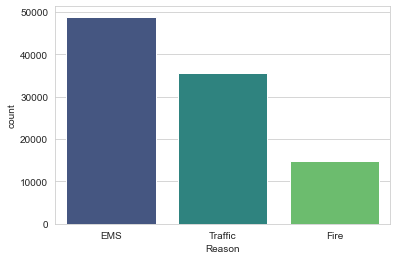

In [13]:
sns.countplot(data=df, x="Reason", palette="viridis", order=["EMS", "Traffic", "Fire"])

Now let's begin to focus on time information. What is the data type of the objects in the timeStamp column?

In [14]:
np.dtype(df["timeStamp"])

dtype('O')

These timestamps are loaded as strings. It is necessary to convert the column from strings to DateTime objects.

In [15]:
df["timeStamp"] = pd.to_datetime(df["timeStamp"])

In [16]:
np.dtype(df["timeStamp"])

dtype('<M8[ns]')

We can now easily access the month, day of week and hour of the calls. To make this even easier we can make separate columns for each of these. 

In [17]:
df["Hour"] = df["timeStamp"].apply(lambda x: x.hour) 

In [18]:
df["Month"] = df["timeStamp"].apply(lambda x: x.month)

In [19]:
df["Day of Week"] = df["timeStamp"].apply(lambda x: x.dayofweek)

In [20]:
df["Day of Week"].unique()

array([3, 4, 5, 6, 0, 1, 2], dtype=int64)

The Day of Week is an integer from 0 to 6. To make things more intuitive we can use .map() with a dictionary to map the actual string names to the day of the week

In [21]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df["Day of Week"] = df["Day of Week"].map(dmap)

With all of this set up we can now ask if the proportion between number of calls for each reason is consistent among day of week

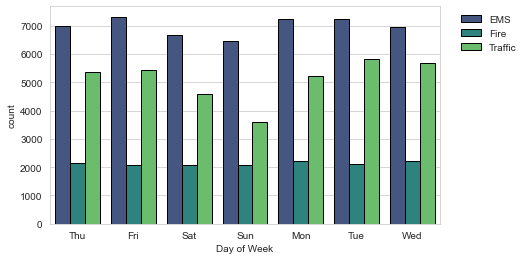

In [22]:
fig = plt.figure(figsize=(7,4))
fig = sns.countplot(x=df["Day of Week"], hue=df["Reason"], palette="viridis", edgecolor="black")
fig.legend(bbox_to_anchor=(1.03,1), edgecolor="white")

And we do the same for Month

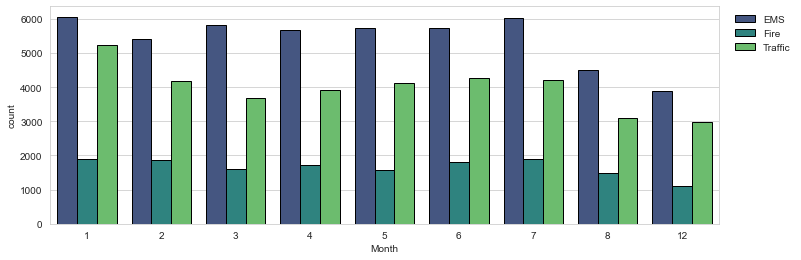

In [23]:
fig1 = plt.figure(figsize=(12,4))
fig1 = sns.countplot(x="Month", data=df, hue=df["Reason"], palette="viridis", edgecolor="black")
fig1.legend(bbox_to_anchor=(1.12,1), edgecolor="white")

The trend seems to be the same for all months and days: EMS is most common and fire is the least common. But more noteworthy is that, for some reason, the data from sept-oct is missing. Let's check if it is actually missing or the data from december is one year prior.

In [24]:
df["Year"] = df["timeStamp"].apply(lambda x: x.year)

In [25]:
df["Year"].unique()

array([2015, 2016], dtype=int64)

Apparently the data is indeed from 2 consecutive years. We can corroborate if indeed only december has data from 2015. 

In [26]:
df[df["Year"] == 2015]["Month"].unique()

array([12], dtype=int64)

So we need to order the months.

In [27]:
mmap = {1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5:"May", 6:"Jun", 7:"Jul", 8:"Aug", 9:"Sep", 10:"Oct", 11:"Nov", 12:"Dec"}
df["Month"] = df["Month"].map(mmap)
df["Month"] = pd.Categorical(df["Month"], categories=["Dec", "Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug"],
                            ordered=True)

Now we can plot the count of calls for each month. First we need to group by month.

In [28]:
by_month = df.groupby("Month").count()
by_month.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week,Year
Month,,,,,,,,,,,,,
Dec,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969,7969
Jan,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205
Feb,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467
Mar,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101
Apr,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326


We can use any column that doesn't have missing values, such as year.

Text(0, 0.5, 'Call count')

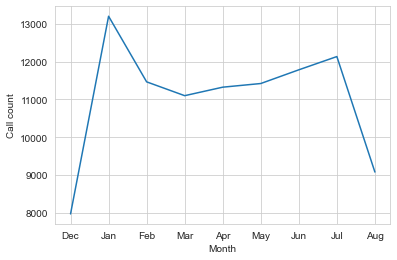

In [29]:
sns.lineplot(x=by_month.index, y="Year", data=by_month)
plt.ylabel("Call count")

For some reason there is peak activity on january and july. The low rates of calls on december and august might be attributable to data comming from only a fraction of those months, since they are the first and last on the dataset. To check if this is the case we need to analyze the calls on a daily scale. 

In [30]:
df["Date"] = df["timeStamp"].apply(lambda x: x.date())

With this we can plot the number of calls recieved on a daily basis.

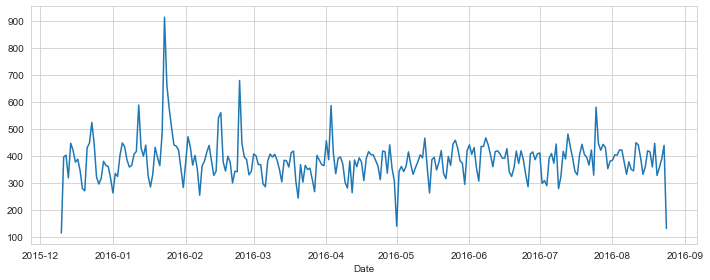

In [31]:
plt.figure(figsize=(10,4))
df.groupby("Date").count()["lat"].plot()
plt.ylabel("")
plt.tight_layout()

Indeed, we can see that the data starts somewhere arround december 10 and ends arround august 20. The peak on january needs further explanation.
For now, let's analyze the daily behavior of number of calls by reason. To do so we will plot with a new function.

In [32]:
def daily_count(reason):
    new = df[df["Reason"] == reason].groupby("Date").count()["Year"].plot(label=reason)

Text(0.5, 1.0, 'Traffic')

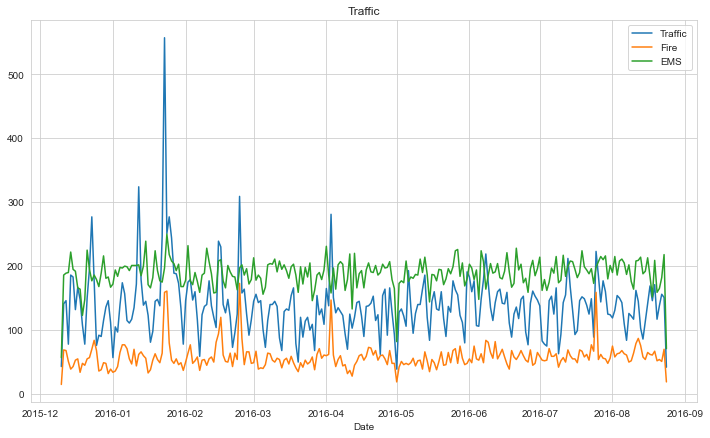

In [33]:
plt.figure(figsize=(10,6))
daily_count("Traffic")
daily_count("Fire")
daily_count("EMS")
plt.legend()
plt.ylabel("")
plt.tight_layout()
plt.title("Traffic")

It seems the higher number of calls on january is due to traffic incidents and fires.

Let's make some heatmaps and see what we find for hourly counts of calls. First we need to restructure the data.

In [34]:
df.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Year,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,Dec,Thu,2015,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,Dec,Thu,2015,2015-12-10


In [35]:
for_heat = df.groupby(["Day of Week", "Hour"]).count()["lat"].unstack(level=1)

In [36]:
for_heat

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

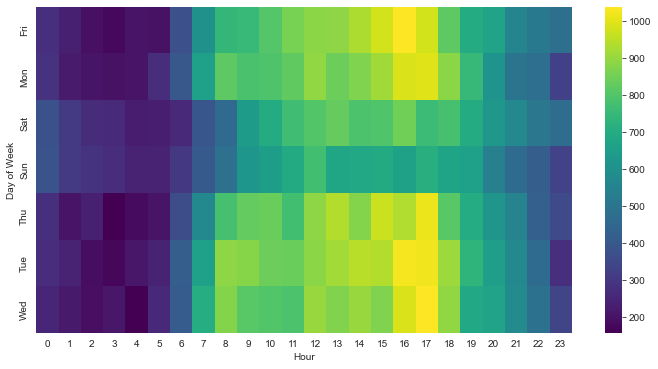

In [37]:
plt.figure(figsize=(12,6))
sns.heatmap(for_heat, cmap="viridis")

Unsurprisingly, most calls happen during the day, between 7am and 8pm, and the bussiest hours are 4-6pm. Also unsurprisingly, more calls are made on weekdays, since there isn't so much traffic on weekends.

We can repeat the same analysis for a lower granularity, namely for month and day of week

In [38]:
day_month = df.groupby(["Day of Week", "Month"]).count()["lat"].unstack(level=1)
day_month

Month,Dec,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug
Day of Week,,,,,,,,,
Fri,1065,1970,1581,1525,1958,1730,1649,2045,1310
Mon,1257,1727,1964,1535,1598,1779,1617,1692,1511
Sat,978,2291,1441,1266,1734,1444,1388,1695,1099
Sun,907,1960,1229,1102,1488,1424,1333,1672,1021
Thu,1266,1584,1596,1900,1601,1590,2065,1646,1230
Tue,1234,1973,1753,1884,1430,1918,1676,1670,1612
Wed,1262,1700,1903,1889,1517,1538,2058,1717,1295


<AxesSubplot:xlabel='Month', ylabel='Day of Week'>

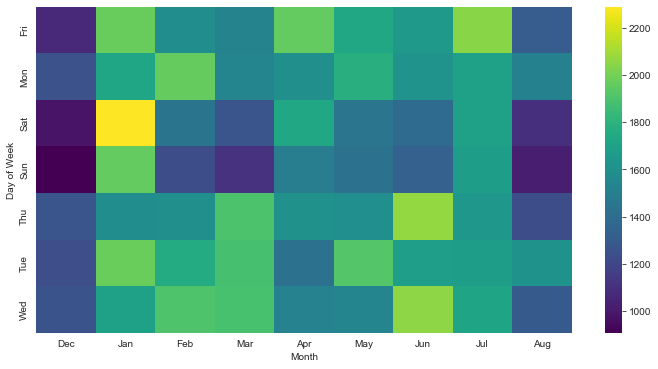

In [39]:
plt.figure(figsize=(12,6))
sns.heatmap(day_month, cmap="viridis")

Again we find that january was the month with most calls, and apparently on saturdays, maybe even one specific saturday in which something extraordinary happened.

In [40]:
!pip install --upgrade jupyterlab-git